# London Boroughs- Housing Price Exploration

## 1. Import Libraries and Data

In [2]:
#Import Libraries

import pandas as pd
import numpy as np
import PIL.Image as img
import matplotlib.pyplot as plt

In [3]:
#Create FilePath Name
url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

#Import File into Pandas DataFrame
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= 'Unnamed: 0', parse_dates = True)

## 2. Explore and Clean Data

In [4]:
#Get Rid of Null Valued Columns and Explore
properties = properties.dropna(axis = 1, how = 'all')
properties = properties.sort_index()
print(properties.head())
print(properties.tail())

           City of London Barking & Dagenham   Barnet   Bexley    Brent  \
1995-01-01          91449            50460.2  93284.5  64958.1  71306.6   
1995-02-01        82202.8            51085.8  93190.2  64787.9  72022.3   
1995-03-01        79120.7              51269  92247.5  64367.5  72015.8   
1995-04-01        77101.2            53133.5  90762.9  64277.7  72965.6   
1995-05-01        84409.1            53042.2    90258  63997.1    73704   

            Bromley  Camden  Croydon   Ealing  Enfield  ... NORTH EAST  \
1995-01-01  81671.5  120933  69158.2  79885.9  72514.7  ...    42076.4   
1995-02-01  81657.6  119509  68951.1  80897.1  73155.2  ...      42572   
1995-03-01  81449.3  120282  68712.4  81379.9  72190.4  ...    42369.7   
1995-04-01  81124.4  120098    68610  82188.9  71442.9  ...    42095.8   
1995-05-01  81542.6  119929  68844.9  82077.1  70630.8  ...    43266.5   

           NORTH WEST YORKS & THE HUMBER EAST MIDLANDS WEST MIDLANDS  \
1995-01-01    43958.5           

In [5]:
#Narrow Columns Down to Relevent Boroughs
cleaned = properties.iloc[:-2,1:33]

#Narrow Time down to Past Two Decades
cleaned = cleaned.loc['1999':'2019',:]
print(cleaned.head(12))

#Resample by Year and Aggregate Over Mean
anual = cleaned.resample('A').sum()/12
print(anual.head())

           Barking & Dagenham  Barnet   Bexley   Brent Bromley  Camden  \
1999-01-01            64531.7  126189  83063.7  105461  112544  170961   
1999-02-01            64165.9  127017  82927.9  105818  111889  173480   
1999-03-01            63528.1  126902  83333.7  107528  112486  178877   
1999-04-01            63579.9  127883  84266.9  106234  114994  182926   
1999-05-01            64508.3  129393  84513.5  106089  117944  180781   
1999-06-01            64704.2  132608  85021.2  107313  119895  185845   
1999-07-01            64920.8  136102  85713.3  110807  121699  191808   
1999-08-01            65385.3  139741  86489.1  114279  123501  198650   
1999-09-01            66003.1  143596  88718.6  117070  125782  203513   
1999-10-01            66367.3  145287  90657.3  119229  128022  206707   
1999-11-01            67344.4  147825    92722  122663  129998  209300   
1999-12-01            68812.2  149510  93905.4  123398  131735  210240   

            Croydon  Ealing  Enfield 

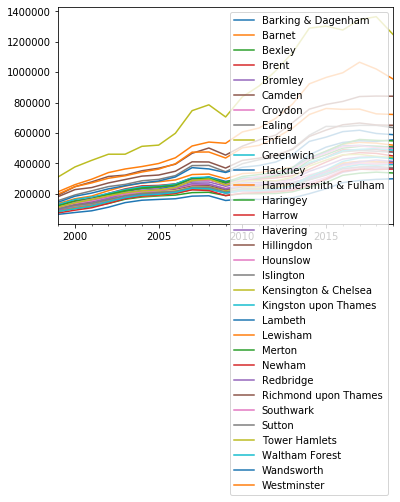

In [6]:
#Visual Exploration
anual.plot()
plt.show()

## 3. Modeling

In [7]:
def ratio(final, initial):
    
    result = final / initial
    
    return result

In [8]:
def difference(final, initial):
    
    result = final - initial
    
    return result

In [9]:
#Examine Price Change as a Ratio
augmented_1 = anual.T
augmented_1['Ratio'] = ratio(augmented_1.loc[:,'2019-12-31'],augmented_1.loc[:,'1999-12-31'])
augmented_1 = augmented_1.sort_values(by = ['Ratio'], ascending = False)

#Examine Price Change as a Difference
augmented_2 = anual.T
augmented_2['Difference'] = difference(augmented_2.loc[:,'2019-12-31'],augmented_2.loc[:,'1999-12-31'])
augmented_2 = augmented_2.sort_values(by = ['Difference'], ascending = False)


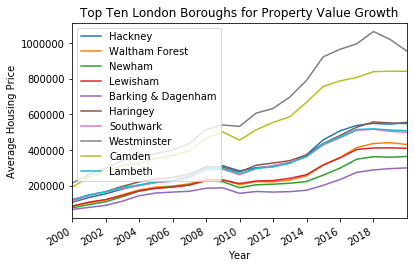

In [10]:
#Plot the Top Ten Boroughs by Growth
highest_growth = augmented_1.head(10).T.iloc[:-1,:]
highest_growth.plot()
plt.xlabel('Year')
plt.ylabel('Average Housing Price')
plt.title('Top Ten London Boroughs for Property Value Growth')
plt.show()

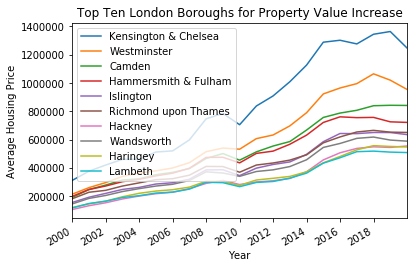

In [11]:
#Plot the Top Ten Boroughs by Increase
greatest_difference = augmented_2.head(10).T.iloc[:-1,:]
greatest_difference.plot()
plt.xlabel('Year')
plt.ylabel('Average Housing Price')
plt.title('Top Ten London Boroughs for Property Value Increase')
plt.show()

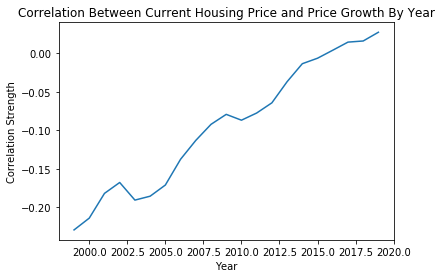

In [12]:
#Look For Relationships
correlations = {}
for year in range(augmented_1.shape[1]-1):
    coef = np.corrcoef(augmented_1.iloc[:,year], augmented_1.iloc[:,-1])
    correlations[year + 1999] = coef[0][1]
    
lists = sorted(correlations.items())
x, y = zip(*lists)
plt.plot(x, y)
plt.xlabel('Year')
plt.ylabel('Correlation Strength')
plt.title('Correlation Between Current Housing Price and Price Growth By Year')
plt.show()

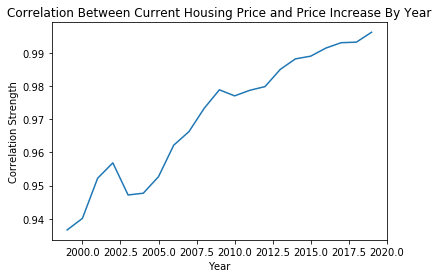

In [13]:
#Look For Realtionships Pt. 2
correlations = {}
for year in range(augmented_2.shape[1]-1):
    coef = np.corrcoef(augmented_2.iloc[:,year], augmented_2.iloc[:,-1])
    correlations[year + 1999] = coef[0][1]
    
lists = sorted(correlations.items())
x, y = zip(*lists)
plt.plot(x, y)
plt.xlabel('Year')
plt.ylabel('Correlation Strength')
plt.title('Correlation Between Current Housing Price and Price Increase By Year')
plt.show()

In [14]:
#Look at Spatial Correlations
print(properties.loc['NaT',highest_growth.columns])
print(properties.loc['NaT',greatest_difference.columns])

var_1 = augmented_1.head(10).index
var_2 = augmented_2.head(10).index
overlap = set(var_1).intersection(set(var_2))
print(overlap)

Hackney               E09000012
Waltham Forest        E09000031
Newham                E09000025
Lewisham              E09000023
Barking & Dagenham    E09000002
Haringey              E09000014
Southwark             E09000028
Westminster           E09000033
Camden                E09000007
Lambeth               E09000022
Name: NaT, dtype: object
Kensington & Chelsea    E09000020
Westminster             E09000033
Camden                  E09000007
Hammersmith & Fulham    E09000013
Islington               E09000019
Richmond upon Thames    E09000027
Hackney                 E09000012
Wandsworth              E09000032
Haringey                E09000014
Lambeth                 E09000022
Name: NaT, dtype: object
{'Lambeth', 'Haringey', 'Hackney', 'Camden', 'Westminster'}


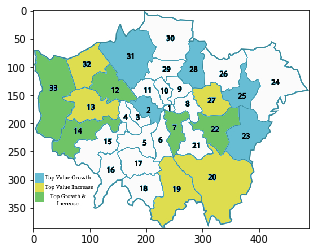

In [15]:
#Blue Boroughs Had the Highest Growth
#Yellow Boroughs had the Highest Increase
#Green Boroughs had Both
boroughs = img.open('Growth-Increase.jpg')
plt.imshow(np.asarray(boroughs))

## 4. Conclusion

$\;\;\;\;$ The data above tells an interesting story. Though there is a negative correlation between starting housing price and housing value (the lower the starting housing price, the more likely it is to have grown by a larger factor) it is not strong enough to be statistically significant with a population of 32 examples. This suggests that, while starting low allows for a greater percentage growth, boroughs with low property values are impeded from gaining value. Indeed, had all boroughs increased in value at the same numeric rate, the correlation would have been much stronger.

$\;\;\;\;$ There is a strong positive correlation between starting housing price and numeric increase in property value, which indicates that the wealthiest neighborhoods in 1999 were the most likely to see the biggest gains in equity over the next two decades. There was also a large overlap between the top ten boroughs for value increase and the top ten boroughs for value growth. This suggests a large amount of disparity between the boroughs of London where the wealthy districts continue to rise in value faster than the poorer districts. 

$\;\;\;\;$ Lastly, there is strong evidence of geographic clustering of the more prosperous neighborhoods as evidenced by the chart above. We can clearly see that North-West and South-East London are home to the most prosperous districts while South-West and Central London, as well as parts of North-East London, have not experienced the same level of growth or increase in property values.